In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [3]:
  
# # IMPORT THE IRIS DATA FROM THE 
# # SKLEARN MODULE
# from sklearn.datasets import load_iris
  
# # LOAD THE IRIS DATASET BY CALLING
# # THE FUNCTION
# iris_data = load_iris()
 
  
# # PLACE THE IRIS DATA IN A PANDAS
# # DATAFRAME
# attr = pd.DataFrame(data=iris_data.data, 
#                   columns=iris_data.feature_names)
# target =pd.DataFrame({'Species': iris_data.target})

# # DISPLAY FIRST 5 RECORDS OF THE 
# # DATAFRAME
# target.head()
# attr.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


sklearn.utils._bunch.Bunch

In [5]:
# Loading iris
df = pd.read_csv('C:/Users/kdehn/OneDrive - stevens.edu/___Data/CSV_files/iris.csv')
# df.head()
# print(df.describe())
# #data preprocessing
# df['Species'] = pd.Categorical(df['Species'])  # convert Species column to categorical data type
df.head(10)

,Species,SepalLength,SepalWidth,PetalLength,PetalWidth
0,Setosa,50,33,14,2
1,Setosa,46,34,14,3
2,Setosa,46,36,10,2
3,Setosa,51,33,17,5
4,Setosa,55,35,13,2
5,Setosa,48,31,16,2
6,Setosa,52,34,14,2
7,Setosa,49,36,14,1
8,Setosa,44,32,13,2
9,Setosa,50,35,16,6


In [7]:
df = df.dropna() # drops NaN values 
print(df[df.isna().any(axis=1)]) # shows NaN values in data frame if it exists

# Splitting the dataset
attr = df.drop(columns = ['Species'])  # features
target = df['Species']  # target variable
attr.head()
target.head()

Empty DataFrame
Columns: [Species, SepalLength, SepalWidth, PetalLength, PetalWidth]
Index: []


0    Setosa
1    Setosa
2    Setosa
3    Setosa
4    Setosa
Name: Species, dtype: object

In [8]:
target.head()

0    Setosa
1    Setosa
2    Setosa
3    Setosa
4    Setosa
Name: Species, dtype: object

In [9]:
from sklearn.preprocessing import MinMaxScaler
# Initialize MinMaxScaler
scaler = MinMaxScaler()
# Fit and transform the data
attr = pd.DataFrame(scaler.fit_transform(attr), columns=attr.columns)
attr.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,0.194444,0.541667,0.067797,0.041667
1,0.083333,0.583333,0.067797,0.083333
2,0.083333,0.666667,0.000000,0.041667
3,0.222222,0.541667,0.118644,0.166667
4,0.333333,0.625000,0.050847,0.041667


In [10]:

attr_train, attr_test, target_train,target_test  = train_test_split(attr, target,test_size = 0.25, random_state = 4, shuffle = True)
target_train.head()
# attr_train.head()
target_test.head()

128    Virginica
18        Setosa
130    Virginica
105    Virginica
107    Virginica
Name: Species, dtype: object

In [11]:
from sklearn.metrics import accuracy_score
k_values = [3, 5, 10]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(attr_train, target_train)
    target_pred = knn.predict(attr_test)
#     accuracy = round(np.mean(target_test==target_pred ) * 100, 2)
    accuracy = accuracy_score(target_test,target_pred ) 
    print(f'Accuracy of model with k = {k}: {accuracy}%')
    print('')

Accuracy of model with k = 3: 0.9736842105263158%

Accuracy of model with k = 5: 0.9736842105263158%

Accuracy of model with k = 10: 0.9736842105263158%



In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(target_test, target_pred)

print('Confusion Matrix')
print(confusion_matrix(target_test, target_pred))
print()
print('Accuracy score')
print(accuracy_score(target_test, target_pred))
print()
print('Classification Report')
print(classification_report(target_test, target_pred))


Confusion Matrix
[[18  0  0]
 [ 0  8  0]
 [ 0  1 11]]

Accuracy score
0.9736842105263158

Classification Report
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        18
  Versicolor       0.89      1.00      0.94         8
   Virginica       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.96      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [13]:
# target_pred.head()
attr_test['target_pred']=target_pred
# print(target_test)
attr_test['target_actual']= target_test
attr_test.head()


,SepalLength,SepalWidth,PetalLength,PetalWidth,target_pred,target_actual
128,0.416667,0.291667,0.694915,0.750000,Virginica,Virginica
18,0.416667,0.833333,0.033898,0.041667,Setosa,Setosa
130,0.777778,0.416667,0.830508,0.833333,Virginica,Virginica
105,0.611111,0.416667,0.762712,0.708333,Virginica,Virginica
107,0.694444,0.500000,0.830508,0.916667,Virginica,Virginica


[Text(0, 0.5, 'Setosa'), Text(0, 1.5, 'Versicolor'), Text(0, 2.5, 'Virginica')]

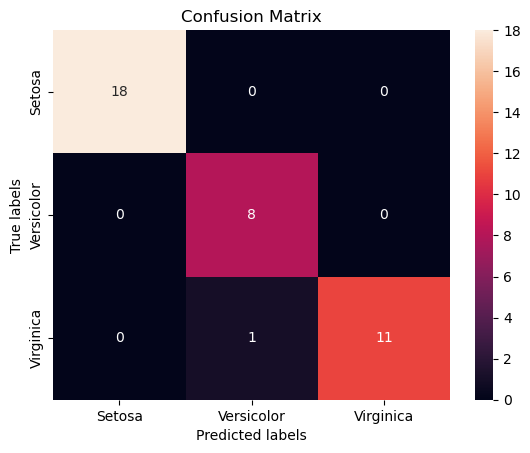

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Setosa', 'Versicolor','Virginica'])
ax.yaxis.set_ticklabels(['Setosa', 'Versicolor','Virginica'])